Installing the required libraries

In [ ]:
!pip install autogluon numpy  scikit-learn matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [ ]:
!pip install -U torch torchaudio --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 144.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 249.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 166.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 274.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 343.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 284.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 195.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 295.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 219.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 147.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 172.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 173.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CV ERA CATUR INTELIGENSIA/trainings/cloud n genAI/codes/Data-Analytics-with-GenAI/Module_3
%pwd

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


'/content/drive/MyDrive/Colab Notebooks'

Importing libraries and load AirPassenger Data set.

In [ ]:
import autogluon
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame
from autogluon.timeseries.models import WaveNetModel
import pandas as pd

# To load local csv  > modify to the right path where the file is present
Y_df = pd.read_csv('./data/AirPassengersDataset.csv')
Y_df = Y_df.reset_index(drop=True)


Define calculate error metrics function which helps in assessing the performance of the trained model

In [ ]:

def calculate_error_metrics(actual, predicted, num_predictors=1):
    # convert inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    # Number of observations
    n = len(actual)
    # Calculate MSE
    mse = mean_squared_error(actual, predicted)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(actual, predicted)
    # Calculate R-squared
    r2 = r2_score(actual, predicted)
    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')
    print(f'r2 : {r2}')
    print(f'adjusted_r2 : {adjusted_r2}')

Converting date field to datetime format and renaming columns to required format

In [ ]:

Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df.rename(columns={"ds":"timestamp","unique_id" :"item_id", "y": "target"},inplace = True)
Y_df['item_id'] = 'airline_1'
Y_df.head()

/tmp/ipython-input-7-3867156055.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Y_df['ds'] = pd.to_datetime(Y_df['ds'])


,item_id,timestamp,target
0,airline_1,2049-01-31,112
1,airline_1,2049-02-28,118
2,airline_1,2049-03-31,132
3,airline_1,2049-04-30,129
4,airline_1,2049-05-31,121


AutoGluon expects time series data in long format. Each row of the data frame contains a single observation (timestep) of a single time series represented by

unique ID of the time series ("**item_id**") as int or str

timestamp of the observation ("**timestamp**") as a pandas.Timestamp or compatible format

numeric value of the time series ("**target**")

In [ ]:
data = TimeSeriesDataFrame.from_data_frame(
    Y_df,
    id_column="item_id",
    timestamp_column="timestamp"
)
data.tail()

target
item_id   timestamp         
airline_1 2060-08-31     606
          2060-09-30     508
          2060-10-31     461
          2060-11-30     390
          2060-12-31     432

Split data into **train** and **test**

In [ ]:
train_data = data.head(132)
test_data = data.tail(12)

Create a **TimeSeriesPredictor** object to forecast future values and explicitly define "**chronos_large_ensemble**" to be used

In [ ]:
prediction_length =12
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
train_data, presets="chronos_large_ensemble"
)

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/Colab Notebooks/AutogluonModels/ag-20250619_141441'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       11.06 GB / 12.67 GB (87.3%)
Disk Space Avail:   48.78 GB / 100.00 GB (48.8%)
Setting presets to: chronos_large_ensemble

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'batch_size': 8, 'model_path': 'large'},
                     'DirectTabular': {},
                     'PatchTST': {},
                     'RecursiveTabular': {},
                     'SeasonalNaive': {},
                     'TemporalFusionTransformer': {}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 12,


Predict for the next defined horizon

In [ ]:
predictions = predictor.predict(train_data)

Model not specified in predict, will default to the model with the best validation score: RecursiveTabular


In [ ]:
predictions

mean         0.1         0.2         0.3  \
item_id   timestamp                                                    
airline_1 2060-01-31  409.050995  390.950062  397.163740  401.644240   
          2060-02-29  388.893677  363.295091  372.082560  378.418943   
          2060-03-31  453.047974  421.696238  432.458645  440.219097   
          2060-04-30  444.603302  408.401436  420.828793  429.789792   
          2060-05-31  467.213440  426.738523  440.632731  450.651432   
          2060-06-30  528.337036  483.998986  499.219328  510.194265   
          2060-07-31  604.175415  556.284847  572.724696  584.578983   
          2060-08-31  612.484985  561.287815  578.862752  591.535518   
          2060-09-30  512.675598  458.372798  477.013834  490.455333   
          2060-10-31  454.367310  397.127133  416.776510  430.945093   
          2060-11-30  409.367310  349.333306  369.941746  384.801882   
          2060-12-31  452.367310  389.663838  411.188652  426.709557   

                             0.4         0.5         0.6         0.7  \
item_id   timestamp                                                    
airline_1 2060-01-31  405.472661  409.050995  412.629328  416.457750   
          2060-02-29  383.833149  388.893677  393.954205  399.368410   
          2060-03-31  446.850118  453.047974  459.245829  465.876850   
          2060-04-30  437.446635  444.603302  451.759969  459.416812   
          2060-05-31  459.212043  467.213440  475.214837  483.775448   
          2060-06-30  519.571945  528.337036  537.102128  546.479807   
          2060-07-31  594.708034  604.175415  613.642796  623.771847   
          2060-08-31  602.363930  612.484985  622.606041  633.434453   
          2060-09-30  501.940597  512.675598  523.410599  534.895864   
          2060-10-31  443.051625  454.367310  465.682994  477.789526   
          2060-11-30  397.499320  409.367310  421.235299  433.932737   
          2060-12-31  439.971598  452.367310  464.763021  478.025062   

                             0.8         0.9  
item_id   timestamp                           
airline_1 2060-01-31  420.938249  427.151928  
          2060-02-29  405.704793  414.492262  
          2060-03-31  473.637303  484.399710  
          2060-04-30  468.377811  480.805168  
          2060-05-31  493.794149  507.688357  
          2060-06-30  557.454744  572.675086  
          2060-07-31  635.626135  652.065983  
          2060-08-31  646.107219  663.682156  
          2060-09-30  548.337362  566.978398  
          2060-10-31  491.958109  511.607486  
          2060-11-30  448.792873  469.401313  
          2060-12-31  493.545967  515.070782

Measure the models accuracy

In [ ]:
calculate_error_metrics(test_data['target'],predictions['mean']['airline_1'])

MSE : 231.54920959472656
RMSE : 15.21674109639533
MAPE : 0.026969028636813164
r2 : 0.9582001566886902
adjusted_r2 : 0.9540201723575592


Visualize the predictions

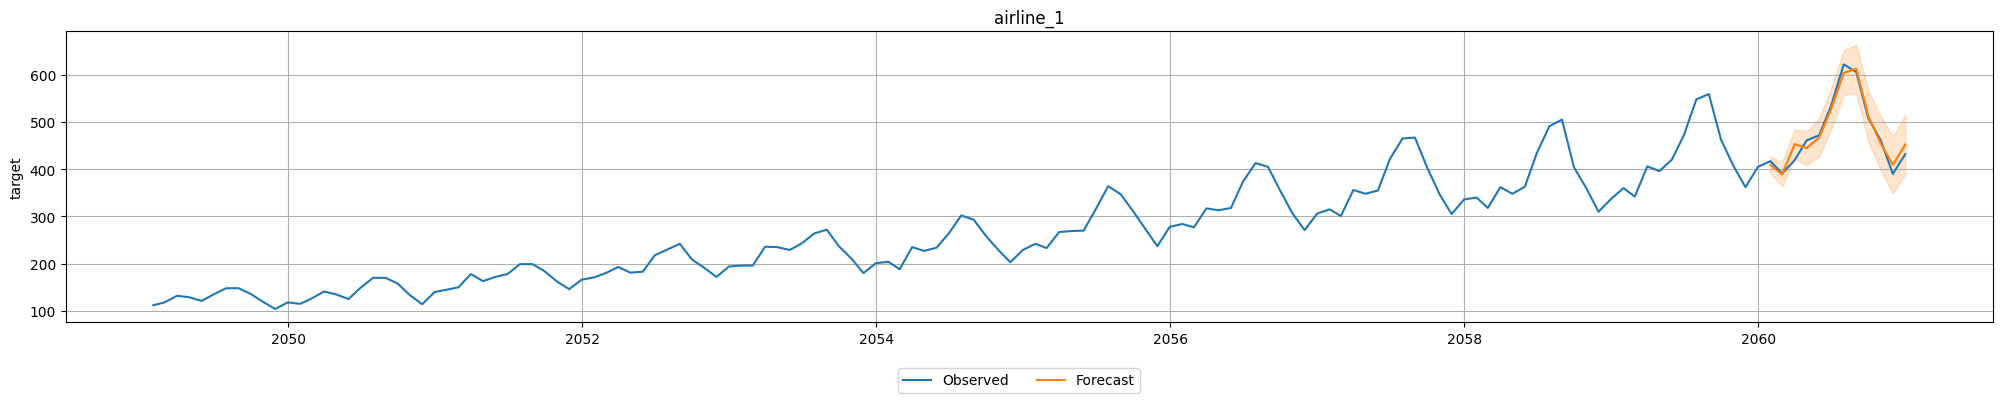

In [ ]:
predictor.plot(
    data=Y_df,
    predictions=predictions,
    item_ids=["airline_1"],
    max_history_length=200,
);